In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [55]:
df = pd.read_csv("/home/isaacp/repos/EvMatsim/contribs/rlev/i-15-results/20250610_160808_850700/initialoutput/output/ITERS/it.0/0.countscompare.txt", sep="\t")

In [56]:
df.head()

,Link Id,Count Station Id,Hour,MATSIM volumes,Count volumes,Relative Error,Normalized Relative Error,GEH
0,1000,23103138,1,3,173,-0.983,0.983,18.122
1,1000,23103138,2,6,90,-0.933,0.933,12.124
2,1000,23103138,3,9,51,-0.824,0.824,7.668
3,1000,23103138,4,7,40,-0.825,0.825,6.807
4,1000,23103138,5,4,62,-0.935,0.935,10.097


In [57]:
# divide by 100 to get the 1 percent sample we trained for
df['Count volumes'] = df['Count volumes'] / 100

In [58]:
link_ids = df["Link Id"].unique()

min_mape = np.inf
min_mape_link = None
max_mape = -np.inf
max_mape_link = None

for link_id in link_ids:
    link_df = df[df["Link Id"] == link_id]
    actual = link_df["Count volumes"].values
    predicted = link_df["MATSIM volumes"].values
    mask = actual != 0
    if np.any(mask):
        mape = np.mean(np.abs((predicted[mask] - actual[mask]) / actual[mask])) * 100

        if mape < min_mape:
            min_mape = mape
            min_mape_link = link_id
        if mape > max_mape:
            max_mape = mape
            max_mape_link = link_id

print(f"Minimum MAPE: {min_mape:.2f}% on link {min_mape_link}")
print(f"Maximum MAPE: {max_mape:.2f}% on link {max_mape_link}")


Minimum MAPE: 40.34% on link 1242
Maximum MAPE: 6497.05% on link 422


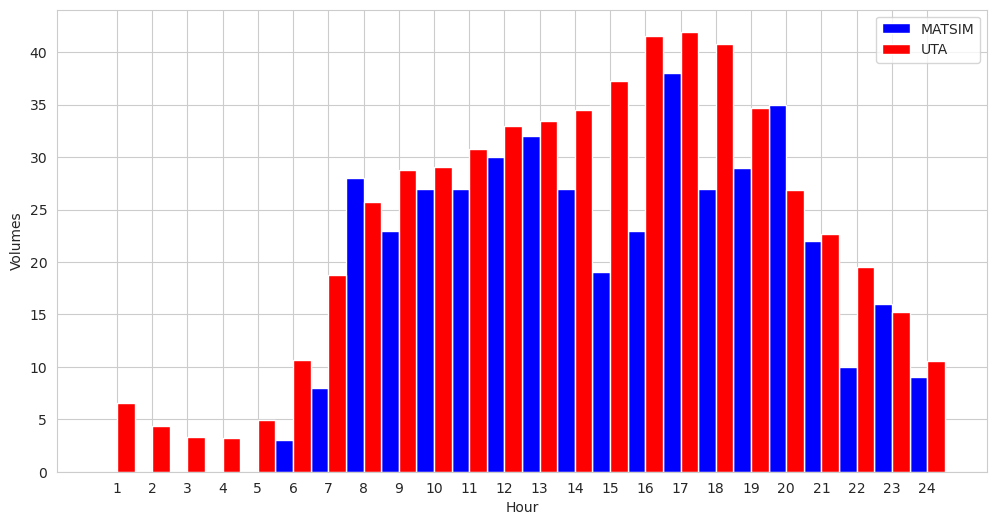

In [65]:
link = 1242
df_link = df[df["Link Id"] == link]

unique_hours = pd.unique(df_link["Hour"])
bar_width = 0.5  # Width of each bar

# X positions for each set of bars
r1 = np.arange(len(unique_hours))
r2 = [x + bar_width for x in r1]


plt.figure(figsize=(12, 6))

plt.bar(
    r1, df_link["MATSIM volumes"], color="blue", width=bar_width, label="MATSIM"
)
plt.bar(
    r2, df_link["Count volumes"], color="red", width=bar_width, label="UTA"
)

# Plot MATSIM volumes histogram

# Labels, title, and legend
plt.xlabel("Hour")
plt.ylabel("Volumes")
plt.xticks([r + (bar_width / 2) for r in range(len(unique_hours))], unique_hours)
plt.legend()

plt.savefig("./best_flow.pdf")